In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

**Data Loading and Cleaning:**

In [48]:
retail_sales = pd.read_csv('/content/retail_sales_dataset.csv')
retail_sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
retail_sales.shape

(1000, 9)

**There are 1000 columns and 9 rows**

In [4]:
retail_sales.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

**There is no null values in this dataset**

In [5]:
retail_sales.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


**Descriptive Statistics of the dataset**

**Time Series Analysis:**

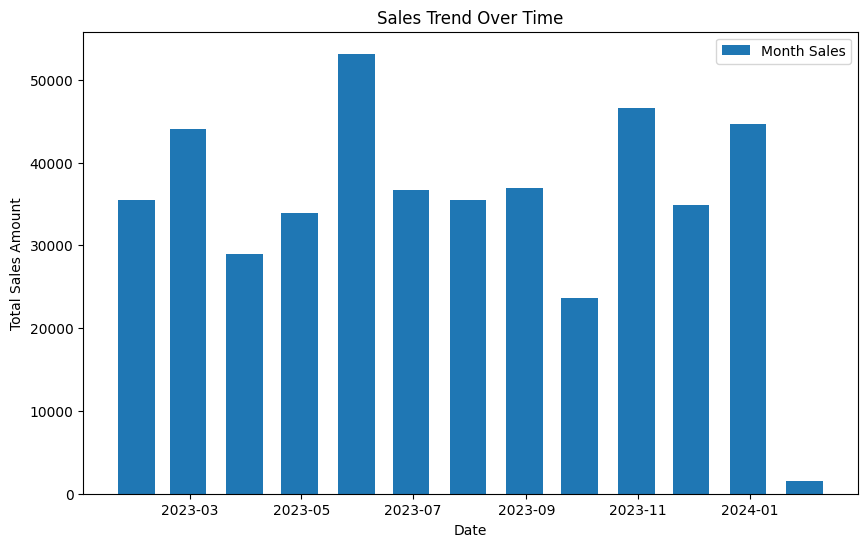

In [7]:
retail_sales['Date'] = pd.to_datetime(retail_sales['Date'])
monthly_sales = retail_sales.set_index('Date').resample('M').sum()
plt.figure(figsize = (10,6))
plt.bar(monthly_sales.index, monthly_sales['Total Amount'], width= 20, label='Month Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.title('Sales Trend Over Time')
plt.legend()

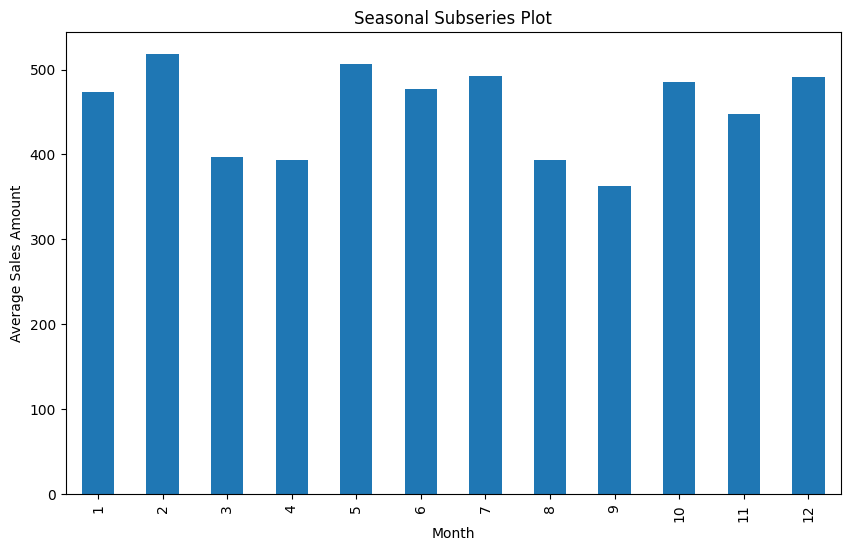

In [8]:
plt.figure(figsize=(10, 6))
retail_sales['Date'] = pd.to_datetime(retail_sales['Date'])
retail_sales['Month'] = retail_sales['Date'].dt.month
seasonal_subseries = retail_sales.groupby('Month')['Total Amount'].mean()
seasonal_subseries.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Sales Amount')
plt.title('Seasonal Subseries Plot')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

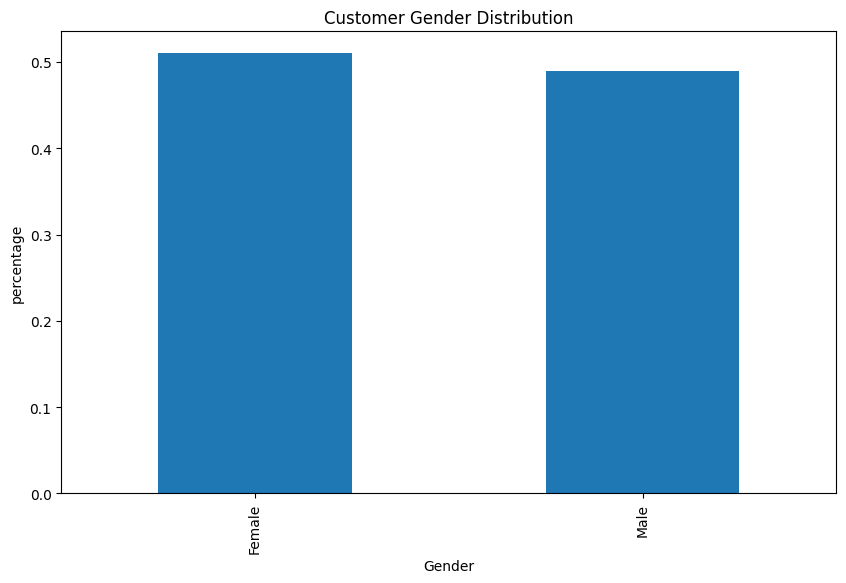

In [9]:
gender_distribution = retail_sales['Gender'].value_counts(normalize=True)
age_group = pd.cut(retail_sales['Age'], bins=[0,20,30,40,50,60,float('inf')], labels=['<20','20-30','30-40','40-50','50-60','60+'])
age_group_distribution = retail_sales['Age'].value_counts(normalize=True)
plt.figure(figsize=(10,6))
gender_distribution.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('percentage')
plt.title('Customer Gender Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

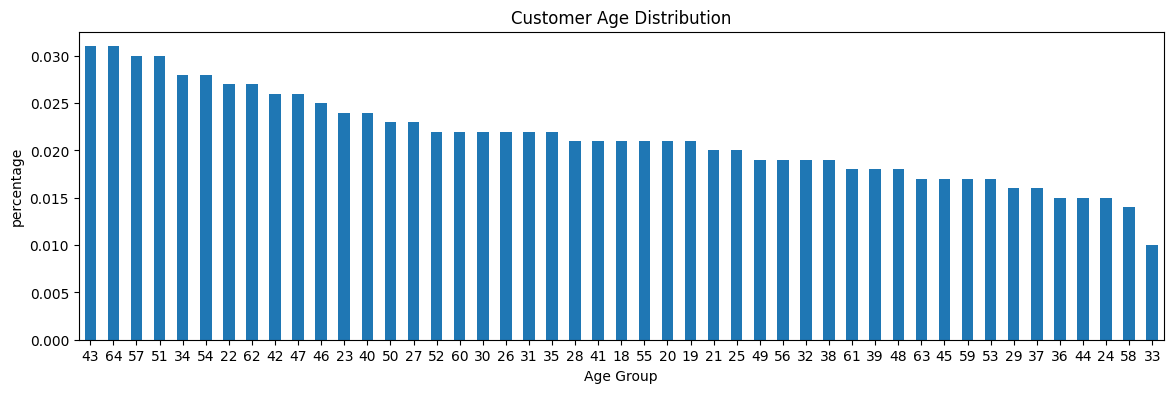

In [10]:
plt.figure(figsize=(14,4))
age_group_distribution.plot(kind='bar', rot=0)
plt.xlabel('Age Group')
plt.ylabel('percentage')
plt.title('Customer Age Distribution')
plt.show

Text(0.5, 1.0, 'Product category prefrence')

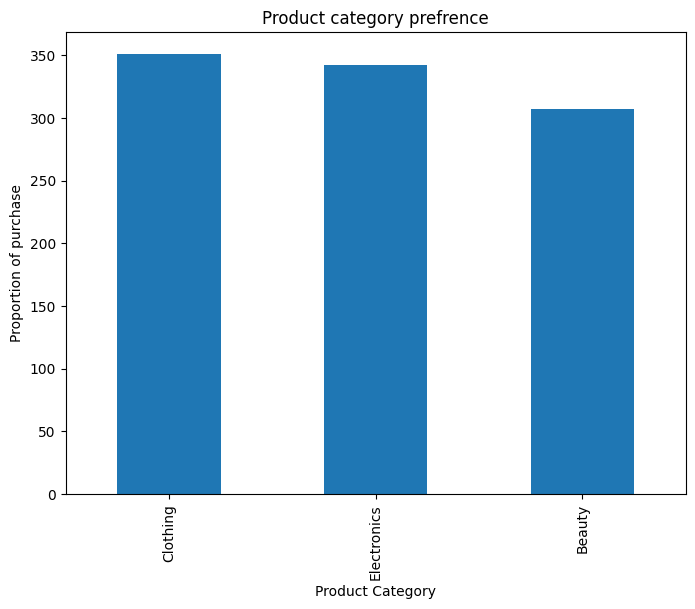

In [24]:
product_category = retail_sales['Product Category'].value_counts()
plt.figure(figsize = (8,6))
product_category.plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Proportion of purchase')
plt.title('Product category prefrence')

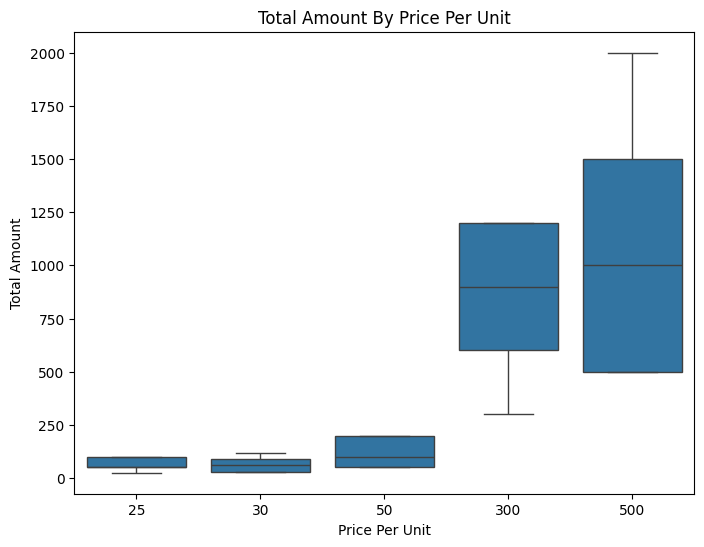

In [84]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Price per Unit', y='Total Amount', data = retail_sales)
plt.xlabel('Price Per Unit')
plt.ylabel('Total Amount')
plt.title('Total Amount By Price Per Unit')
plt.show()

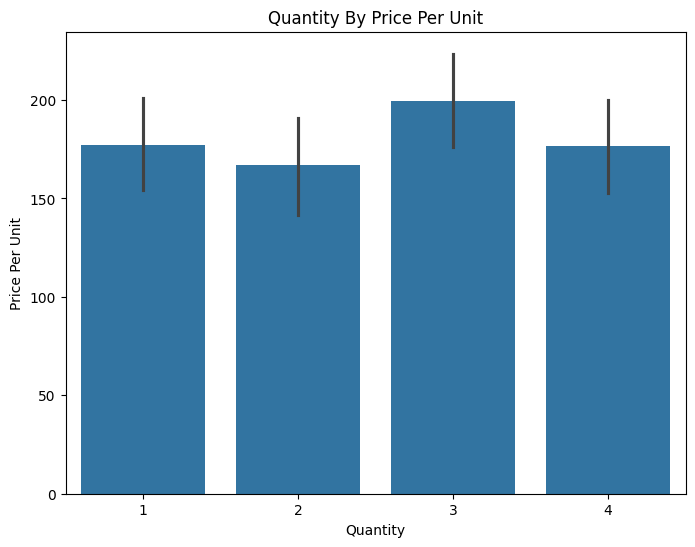

In [89]:
plt.figure(figsize=(8,6))
sns.barplot(x='Quantity', y='Price per Unit', data = retail_sales)
plt.xlabel('Quantity')
plt.ylabel('Price Per Unit')
plt.title('Quantity By Price Per Unit')
plt.show()

Text(70.72222222222221, 0.5, 'Product Category')

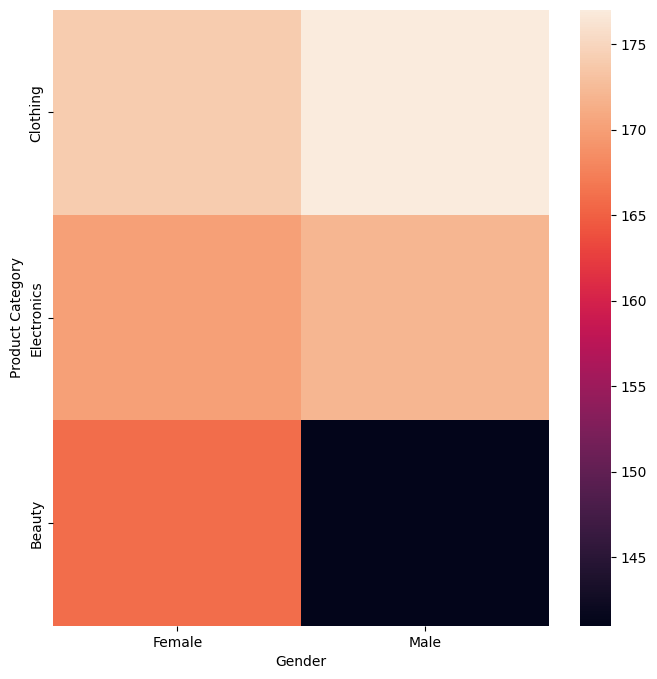

In [96]:
plt.subplots(figsize=(8, 8))
retail_sales_hist = pd.DataFrame({
    x_label: grp['Product Category'].value_counts()
    for x_label, grp in retail_sales.groupby('Gender')})
sns.heatmap(retail_sales_hist)
plt.xlabel('Gender')
plt.ylabel('Product Category')